Подотрешь!
40.4
Хроники пикирующего Баклана
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Нурсултан и Гильденстерн
39.8
Шевелись, Плотва!
50.2
Абсолютная власть
42.4
Дениса не пустили
38.0
УМАПАЛАТА
38.6
Лентацентричность
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Монморенси
38.6
Ибрагим и Никита
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
ХЗ. Хорощие Знакомые
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Зеленая морская свинка
31.0
Заметьте, не я это предложил
34.0
Давайте ещё немного подумаем!
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Алти-матики
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Собака Пржевальского
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Запрещённые полеты
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Глоточек холодненького
Empty DataFrame
Columns: [team_name, avg_score]
Index: []
Две пиццы
32.6
В предыдущих сериях
28.4
Хомяки
Empty DataFrame
Columns: [team_nam

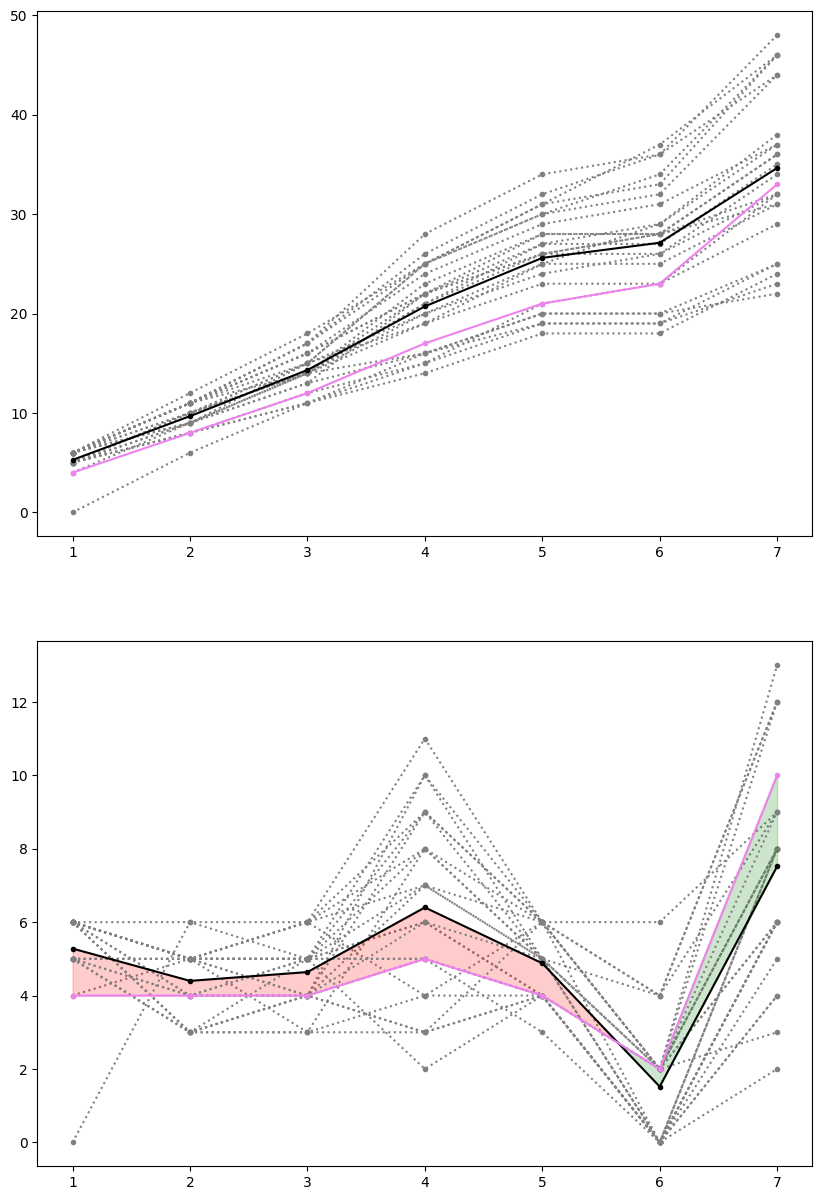

In [7]:
import pandas as pd
from lxml import etree
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import database_reader

# web = urllib.request.urlopen("https://quizplease.ru/game-page?id=53576")
# s = web.read().decode('utf-8')
#
# html = etree.HTML(s)
#
# tr_nodes = html.xpath('//*[@id="resultsAnchor"]/div/div[3]/table')
#
# header = list(map(lambda x: x.text, tr_nodes[0].xpath('thead/tr/td')))
# data = [[td.text for td in tr.xpath('td')] for tr in tr_nodes[0].xpath('tr')]
# np_data = np.array(data)[:, 3:-1].astype(int)



# print(header)
# print(data)

con, cur = database_reader.load()
data = np.array(pd.read_sql("SELECT * FROM SCORES WHERE game_id = 14697", con))
all_scores = data[:,3:-1].astype(float)

round_numbers = [1, 2, 3, 4, 5, 6, 7]
round_max_scores = [6, 6, 6, 12, 6, 6, 18]
highlighted_team_name = 'Давайте ещё немного подумаем!'
lowest_considered_place = 25

# rewrite using DF ??? .group_by().head(5)

top_teams_query = f"""
WITH last_5_games AS (
    SELECT *, ROW_NUMBER()
    over (
        PARTITION BY team_name
        ORDER BY game_id
    ) AS rn
    FROM SCORES s join GAMES g on s.game_id = g.id
    WHERE title = 'Квиз, плиз! SPB'
)
SELECT team_name, avg(final_score) avg_score
FROM last_5_games
WHERE rn <= 5
GROUP BY team_name
HAVING count(1) >= 5
ORDER BY avg_score desc
"""





top_teams = pd.read_sql(top_teams_query, con)

def get_rarity_color(team_name):
    avg_score = top_teams[top_teams['team_name'] == team_name]

    if (len(avg_score.values) > 0):
        avg_score = avg_score.values[0][1]

    print(team_name)
    print(avg_score)

fig, (ax1, ax2) = plt.subplots(2)

ax1.figure.set_size_inches(10, 15)

mean = np.mean(all_scores[:lowest_considered_place,:], axis = 0)
accumulated_mean = np.add.accumulate(mean)

ax1.plot(round_numbers, accumulated_mean, label = 'mean', marker = '.', linestyle = 'solid', color = 'black', zorder = 5)
ax2.plot(round_numbers, mean, label = 'mean', marker = '.', linestyle = 'solid', color = 'black', zorder = 5)

# plt.yticks(range(0, 18))
for idx in range(0, lowest_considered_place):
    place = idx + 1
    scores = all_scores[idx]
    accumulated_scores = np.add.accumulate(scores)
    team_name = data[idx][2]

    get_rarity_color(team_name)
    # print(team_name)
    # print(scores)
    # print(accumulated_scores)
    # print()

    highlighted_team = team_name == highlighted_team_name

    color = 'violet' if highlighted_team else 'gray'
    zorder = 10 if highlighted_team else 1
    linestyle = 'solid' if highlighted_team else 'dotted'

    ax1.plot(round_numbers, accumulated_scores, label = team_name, marker = '.', linestyle = linestyle, color = color, zorder = zorder)
    ax2.plot(round_numbers, scores, label = team_name, marker = '.', linestyle = linestyle, color = color, zorder = zorder)

    if highlighted_team:
        ax2.fill_between(round_numbers, scores, mean, scores - mean > 0, alpha=0.2, color = 'green', interpolate = True)
        ax2.fill_between(round_numbers, scores, mean, scores - mean < 0, alpha=0.2, color = 'red', interpolate = True)




# print(mean)
# print(accumulated_mean)


# plt.legend(bbox_to_anchor = (0.5, -0.45), loc='lower center')

# ax1.legend()
# ax2.legend()
# plt.show()